In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

STEP 2 : CREATE THE DATASET


In [3]:
# SET THE  RANDOM SEED FOR REPRODUCIBILITY
np.random.seed(42)

# Create a synthetic dataset
data = {
    'product_id' : range(1, 21),
    'product_name' : [f'product {i}' for i in range(1, 21)],
    'category' : np.random.choice(['Electronics', 'Clothing', 'Home', 'Sports'], 20),
    'units_sold':np.random.poisson(lam=20, size =20), # Poisson disstribution for sales
    'sale_date': pd.date_range(start='2023-01-01', periods=20, freq='D')
}

sales_data = pd.DataFrame(data)

# Display the first few rows of the dataset
print("Sales Data:")
print(sales_data)

Sales Data:
    product_id product_name     category  units_sold  sale_date
0            1    product 1         Home          25 2023-01-01
1            2    product 2       Sports          15 2023-01-02
2            3    product 3  Electronics          17 2023-01-03
3            4    product 4         Home          19 2023-01-04
4            5    product 5         Home          21 2023-01-05
5            6    product 6       Sports          17 2023-01-06
6            7    product 7  Electronics          19 2023-01-07
7            8    product 8  Electronics          16 2023-01-08
8            9    product 9         Home          21 2023-01-09
9           10   product 10     Clothing          21 2023-01-10
10          11   product 11         Home          17 2023-01-11
11          12   product 12         Home          22 2023-01-12
12          13   product 13         Home          14 2023-01-13
13          14   product 14         Home          17 2023-01-14
14          15   product 15 

In [4]:
# Save the DataFrame as a csv file
sales_data.to_csv('sales_data.csv', index=False)

In [5]:
# path location
import os
os.getcwd()

'c:\\Users\\Vejan\\AVSCODE\\inferential statistics'

STEP 3 : DESCRIPTIVE STATISTICS

In [6]:
# Descriptive statistics
descriptive_stats = sales_data['units_sold'].describe()

# DAISPLAY DESCRIPTIVE STATISTICS
print("\nDescriptive Statistics for Units Sold:")
print(descriptive_stats)

# Additional statistics
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()

# Group by category and calculate total and average sales
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()
category_stats.columns = ['category', 'Total Units Sold', 'Average Units Sold', 'Std Dev of units sold']

# DISPLAY THE RESULTS
print("\nStatistical Analysis:")
print(f"Mean Units Sold: {mean_sales}")
print(f"Median Units Sold: {median_sales}")
print(f"Mode Units Sold: {mode_sales}")
print(f"Variance of Units Sold: {variance_sales}")
print(f"Standard Deviation of Units Sold: {std_deviation_sales}")
print("\nCategory Statsitics:")
print(category_stats)


Descriptive Statistics for Units Sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis:
Mean Units Sold: 18.8
Median Units Sold: 18.5
Mode Units Sold: 17
Variance of Units Sold: 10.90526315789474
Standard Deviation of Units Sold: 3.3023117899275864

Category Statsitics:
      category  Total Units Sold  Average Units Sold  Std Dev of units sold
0     Clothing                21           21.000000                    NaN
1  Electronics                73           18.250000               2.217356
2         Home               181           20.111111               3.723051
3       Sports               101           16.833333               2.714160


STEP 4 : INFERENTIAL STATSITICS

In [7]:
# cONFIDENCE LEVEL FOR THE MEAN OF UNITS SOLD
confidence_level = 0.95
degrees_freedom  = len(sales_data['units_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

# t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence interval for the mean of units sold:")
print(confidence_interval)


Confidence interval for the mean of units sold:
(np.float64(17.254470507823573), np.float64(20.34552949217643))


HYPOTHESIS TESTING

In [8]:
# HYPOTHEIS TESTING(t-test)
# Null hypothesis: mean units sold is equal to 20
# Alternative hypothesis: mean units sold is not equal to 20

t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

print("\nHypothesis testing (t-test):")
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The mean units sold is significantly different form 20.")
else:
    print("Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.")


Hypothesis testing (t-test):
T-statistic: -1.6250928099424466, p-value: 0.12061572226781002
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.


STEP 5 : VISUALISATIONS

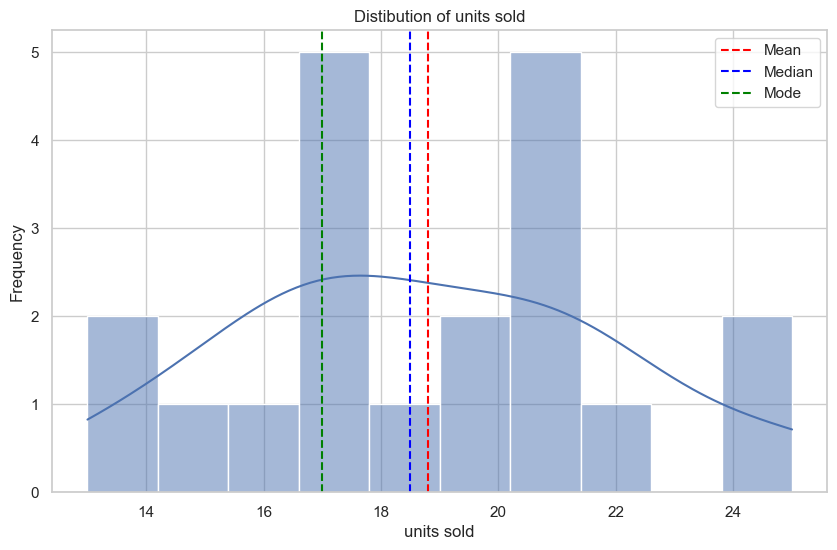

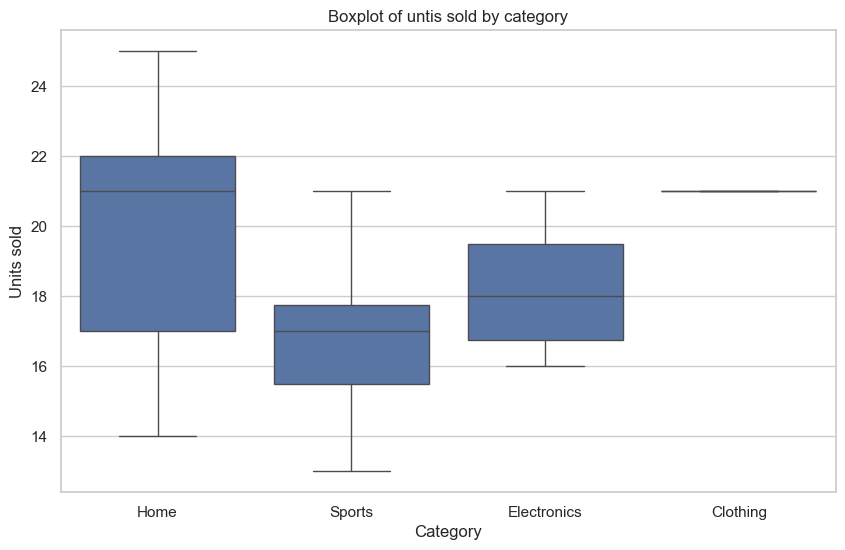

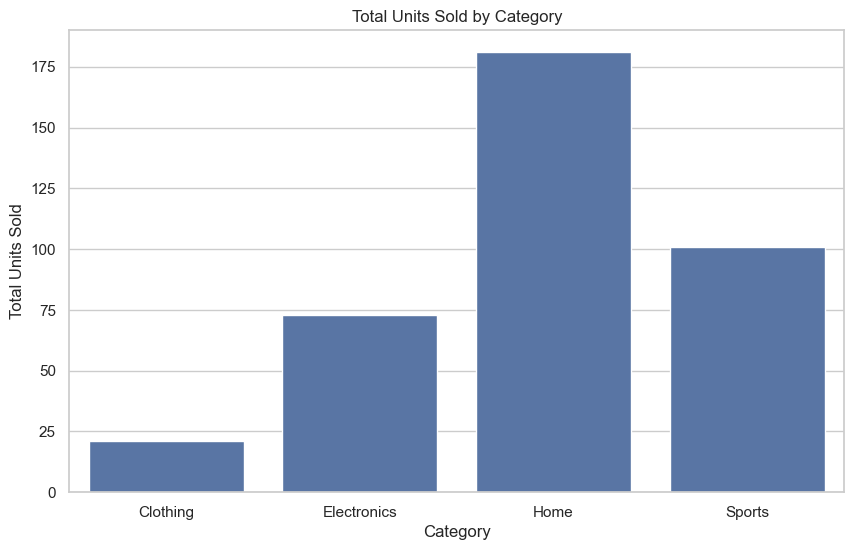

In [21]:
# visualisations
sns.set(style="whitegrid")

# plot distibution of units sold
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title('Distibution of units sold')
plt.xlabel('units sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color ='red', linestyle='--', label='Mean')
plt.axvline(median_sales, color ='blue', linestyle='--', label='Median')
plt.axvline(mode_sales, color ='green', linestyle='--', label='Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title('Boxplot of untis sold by category')
plt.xlabel('Category')
plt.ylabel('Units sold')
plt.show()

# Bar plot for total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='Total Units Sold', data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()
